##### Maximum Likelihood Estimation

In [3]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm

In [4]:
tb1 = pd.read_excel('Data Files\MLE.xlsx')
tb1

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [5]:
x = tb1['X']
y = tb1['Y']
x2 = sm.add_constant(x)
model = sm.OLS(y, x2).fit()

model.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sun, 13 Mar 2022   Prob (F-statistic):            0.00122
Time:                        10:13:42   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.728      -2.692       2.115
X              1.6176      0.134     12.079      0.001       1.191       2.044
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.405
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.089   Prob(JB):                        0.759
Kurtosis:                       1.384   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$Y = -0.2882 + 1.6176*X$

In [6]:
e = model.resid
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [7]:
np.std(e)

0.604882098380483

Parameter estimation by MLE

In [8]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [9]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m*x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 / (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L

x = np.array([1, 4, 5, 6, 9])
y = np.array([2, 6, 7, 9, 15])
lik_model = minimize(lik, np.array([2, 2, 2]), method='L-BFGS-B') 

In [10]:
lik_model

      fun: 4.581084072760748
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.20792266e-05, 7.99360578e-07, 1.33226762e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 18
     njev: 27
   status: 0
  success: True
        x: array([ 1.61764712, -0.28823552,  0.60488214])

Example 2

In [11]:
tb2 = pd.read_excel('Data Files\Regcar.xlsx')

In [12]:
tb2

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [13]:
x = tb2['TV Ads']
y = tb2['car Sold']
x2 = sm.add_constant(x)
model = sm.OLS(y, x2).fit()
model.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sun, 13 Mar 2022   Prob (F-statistic):             0.0190
Time:                        10:13:42   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.024       2.469      17.531
TV Ads         5.0000      1.080      4.629      0.019       1.563       8.437
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.214
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.674
Skew:                           0.256   Prob(JB):                        0.714
Kurtosis:                       1.276   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$y = 10 + 5*x$ 

In [14]:
e = model.resid
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [15]:
np.std(e)

1.6733200530681516

In [16]:
x = np.array([1, 3, 2, 1, 3])
y = np.array([14, 24, 18, 17, 27])
lik_model = minimize(lik, np.array([2, 2, 2]), method='Nelder-Mead')

In [17]:
lik_model

 final_simplex: (array([[ 5.00000631, 10.00000822,  1.67332132],
       [ 4.99996581, 10.00008112,  1.67332683],
       [ 4.99998382, 10.00002278,  1.67329385],
       [ 5.00001119,  9.9999767 ,  1.67334933]]), array([9.66874121, 9.66874121, 9.66874121, 9.66874121]))
           fun: 9.668741209395263
       message: 'Optimization terminated successfully.'
          nfev: 212
           nit: 118
        status: 0
       success: True
             x: array([ 5.00000631, 10.00000822,  1.67332132])

In [18]:
lik_model.x

array([ 5.00000631, 10.00000822,  1.67332132])

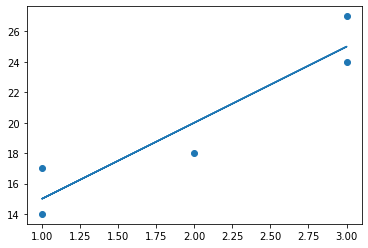

In [19]:
plt.scatter(x, y)
plt.plot(x, lik_model['x'][0] * x + lik_model['x'][1])
plt.show()

In [20]:
minimize?

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is an 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where 'n' is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <o

### Logistic Regression

Simmons owns and operates a national chain of women's apparel stores.

5000 copies of an expensive four-color sales catalog have been printed, and each catalog includes a coupon that provides a $50 discount on purchases of $200 and more. 

The catalogs are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.

In [23]:
df = pd.read_excel('Data Files\Simmons.xlsx')

In [24]:
df

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


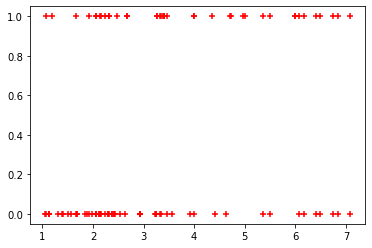

In [25]:
plt.scatter(df.Spending, df.Coupon, marker='+', color='red')

In [26]:
x = df[['Card', 'Spending']]
y = df['Coupon']

In [28]:
x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:                  0.1012
Time:                        10:46:40   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.445      2.471      0.013       0.227       1.970
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
==============================================================================
"""